<a href="https://colab.research.google.com/github/afrarafeeqa2004/machine-learning/blob/main/logisticregressiontitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic-Dataset.csv")
print(data.head())
print(data.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [5]:
data = data.drop(columns=["Name", "Ticket", "Cabin"])

# Fill missing values
data["Age"].fillna(data["Age"].median(), inplace=True)
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

/tmp/ipython-input-3165683017.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].median(), inplace=True)
/tmp/ipython-input-3165683017.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [6]:
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])       # male=1, female=0
data["Embarked"] = le.fit_transform(data["Embarked"])

In [7]:
X = data[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = data["Survived"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8044692737430168
Confusion Matrix:
 [[90 15]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



/tmp/ipython-input-3132240632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0,0], x="Survived", data=data, palette="Set2")
/tmp/ipython-input-3132240632.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(["Female (0)", "Male (1)"])
/tmp/ipython-input-3132240632.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1,2], x=importances, y=features, palette="viridis")


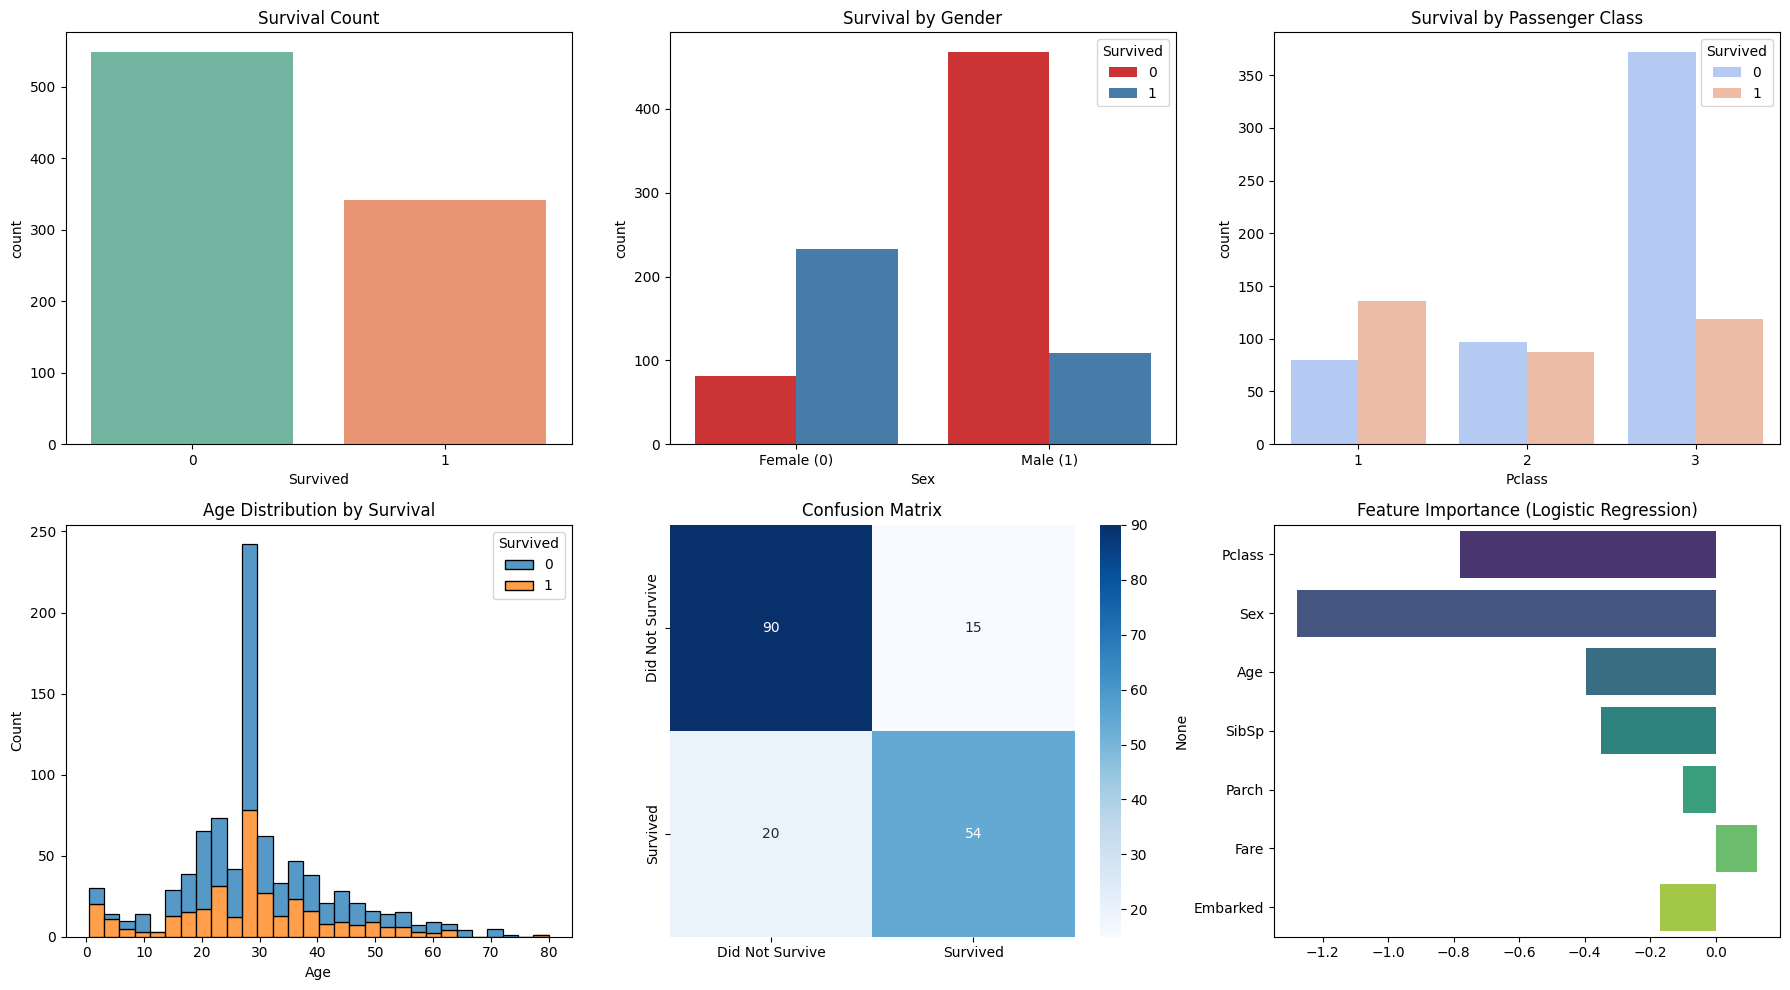

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Survival Count
sns.countplot(ax=axes[0,0], x="Survived", data=data, palette="Set2")
axes[0,0].set_title("Survival Count")

# 2. Survival by Gender
sns.countplot(ax=axes[0,1], x="Sex", hue="Survived", data=data, palette="Set1")
axes[0,1].set_title("Survival by Gender")
axes[0,1].set_xticklabels(["Female (0)", "Male (1)"])

# 3. Survival by Passenger Class
sns.countplot(ax=axes[0,2], x="Pclass", hue="Survived", data=data, palette="coolwarm")
axes[0,2].set_title("Survival by Passenger Class")

# 4. Age Distribution by Survival
sns.histplot(ax=axes[1,0], data=data, x="Age", hue="Survived", multiple="stack", bins=30)
axes[1,0].set_title("Age Distribution by Survival")

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[1,1],
            xticklabels=["Did Not Survive", "Survived"],
            yticklabels=["Did Not Survive", "Survived"])
axes[1,1].set_title("Confusion Matrix")

# 6. Feature Importance
features = X.columns
importances = model.coef_[0]
sns.barplot(ax=axes[1,2], x=importances, y=features, palette="viridis")
axes[1,2].set_title("Feature Importance (Logistic Regression)")

plt.tight_layout()
plt.show()